In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

In [73]:
sample_df = pd.read_csv('./sample_submission.csv')
sample_df

,id,prediction
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
739,739,0.5
740,740,0.5
741,741,0.5
742,742,0.5


In [74]:
train_df = pd.read_csv('./train_data.csv')
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [75]:
test_df = pd.read_csv('./test_data.csv')
test_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,3,A050023001,A050000023,1,2020-01-09 10:56:31,2626
1,3,A050023002,A050000023,1,2020-01-09 10:56:57,2626
2,3,A050023003,A050000023,0,2020-01-09 10:58:31,2625
3,3,A050023004,A050000023,0,2020-01-09 10:58:36,2625
4,3,A050023006,A050000023,0,2020-01-09 10:58:43,2623
...,...,...,...,...,...,...
260109,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
260110,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
260111,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244
260112,7439,A040130004,A040000130,1,2020-10-14 23:09:31,8244


In [76]:
p_test_df = test_df.loc[test_df['answerCode'] ==-1]
target_users = p_test_df['userID'].tolist()
print(len(target_users))
print(len(set(target_users)))

744
744


In [77]:
train_df.loc[train_df['userID'] == 3]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag


## train과 test data는 겹치는 유저가 없다

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 103.8+ MB


In [79]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {train_df.userID.nunique()}
assessmentItemID : {train_df.assessmentItemID.nunique()}
testID           : {train_df.testId.nunique()}
mean answer rate : {train_df.answerCode.sum() / train_df.shape[0] * 100:.2f}%
KnowledgeTag     : {train_df.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 6698
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.44%
KnowledgeTag     : 912
--------------------------


# 전체 문제의 맞고 틀리고 의 비율

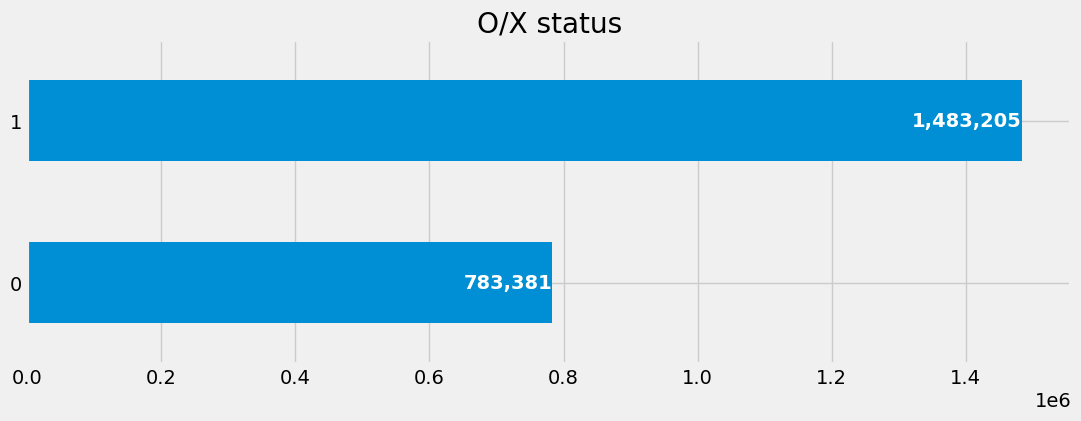

In [80]:
correct = train_df.answerCode.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("O/X status")
plt.xticks(rotation=0)
plt.show()

In [81]:
def aaa(st):
    y = int(st[:4])
    m = int(st[5:7])
    d = int(st[8:10])
    h = int(st[11:13])
    mi = int(st[14:16])
    s = int(st[17:])
    return y*31536000 + m*2592000 + d*86400 + h*3600 + mi*60 + s

df = train_df.copy()
df['Timestamp'] = df['Timestamp'].apply(str)
df['Timestamp'] = df['Timestamp'].apply(aaa)

In [82]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,63712570631,7224
1,0,A060001002,A060000001,1,63712570634,7225
2,0,A060001003,A060000001,1,63712570642,7225
3,0,A060001004,A060000001,1,63712570649,7225
4,0,A060001005,A060000001,1,63712570656,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,63718728621,438
2266582,7441,A040165001,A040000165,1,63725274399,8836
2266583,7441,A040165002,A040000165,1,63725274410,8836
2266584,7441,A040165003,A040000165,1,63725274456,8836


# 가장 마지막 문제 맞았는지 틀렸는지

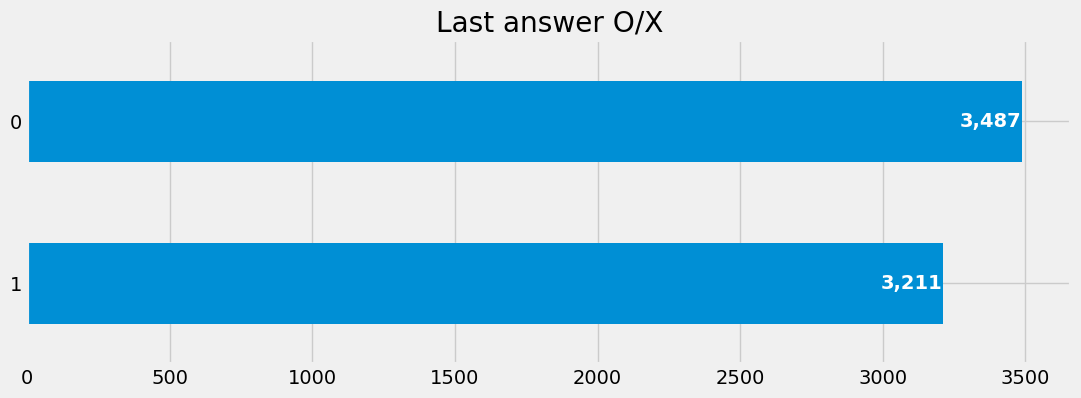

In [83]:
last_ans = df.groupby('userID').apply(lambda subf: subf['answerCode'][subf['Timestamp'].idxmax()])
last_ans = last_ans.reset_index()
last_ans.columns = ['userID', 'answerCode']

# sns.countplot(last_ans.answerCode).set_title('Distribution of last answers by user');
# last_ans.answerCode.value_counts()
last_ans
correct = last_ans.answerCode.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip([0,1], correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Last answer O/X")
plt.xticks(rotation=0)
plt.show()

# 유저별 첫 문제 정답

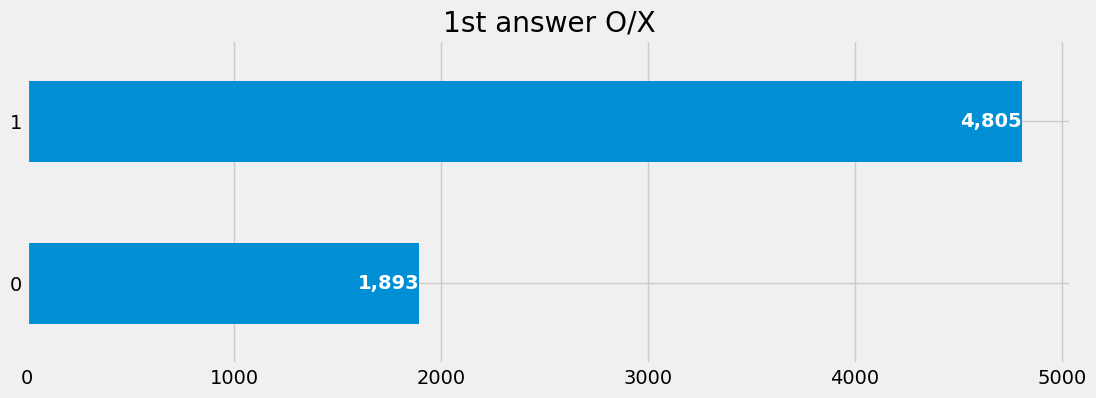

In [84]:
last_ans = df.groupby('userID').apply(lambda subf: subf['answerCode'][subf['Timestamp'].idxmin()])
last_ans = last_ans.reset_index()
last_ans.columns = ['userID', 'answerCode']

# sns.countplot(last_ans.answerCode).set_title('Distribution of last answers by user');
# last_ans.answerCode.value_counts()
last_ans
correct = last_ans.answerCode.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip([0,1], correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("1st answer O/X")
plt.xticks(rotation=0)
plt.show()

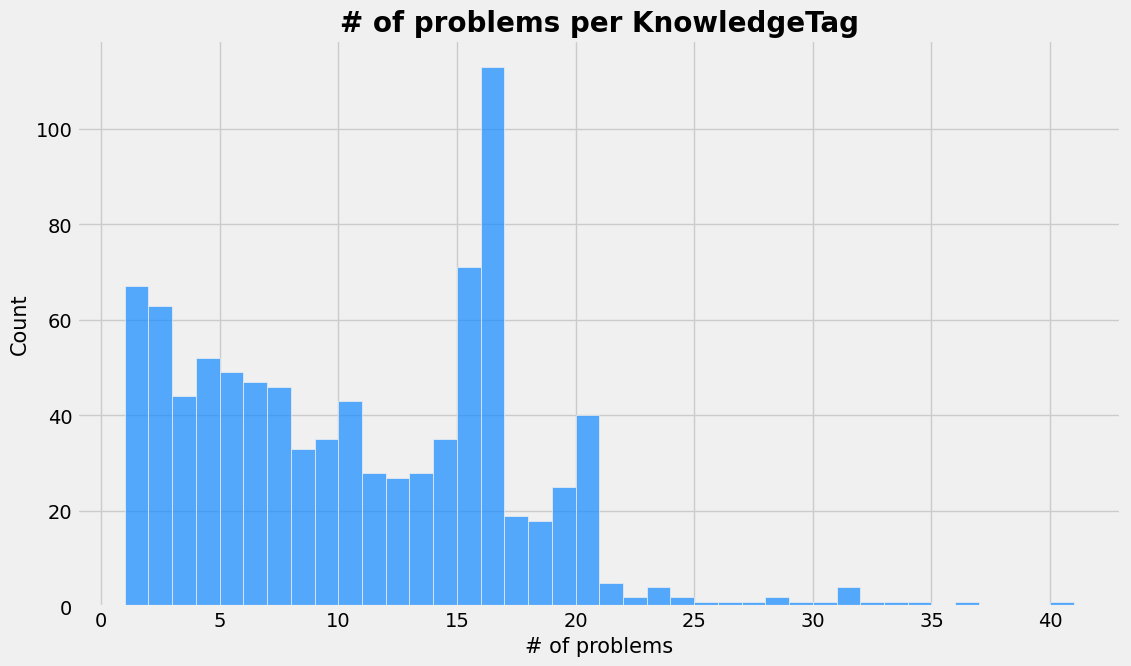

count    912.000000
mean      10.366228
std        6.622292
min        1.000000
25%        5.000000
50%       10.000000
75%       16.000000
max       41.000000
Name: assessmentItemID, dtype: float64

In [85]:
problems_by_tag = df.groupby("KnowledgeTag")["assessmentItemID"].apply(set).apply(len)
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(problems_by_tag, binwidth=1, color="dodgerblue")
ax.set_xlabel("# of problems", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("# of problems per KnowledgeTag", fontsize=20, fontweight="semibold")
plt.show()
problems_by_tag.describe()

# 문제별 정답율

In [86]:
groupby_problem = train_df.groupby("assessmentItemID")["answerCode"].apply(list)
groupby_problem

assessmentItemID
A010001001    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...
A010001002    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
A010001003    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...
A010001004    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
A010001005    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
                                    ...                        
A090074002    [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
A090074003    [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...
A090074004    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
A090074005    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...
A090074006    [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ...
Name: answerCode, Length: 9454, dtype: object

In [87]:
# 문제별로 맞은 사람 수, 틀린 사람수, 정답률 계산
correction = list() # [[문제ID, 맞은사람수, 틀린사람수, 정답률], ...]
for problem, correctness in zip(groupby_problem.index, groupby_problem):
    correction.append([problem, sum(correctness), len(correctness) - sum(correctness), round(sum(correctness) / len(correctness) * 100, 2)])

# 위에서 생성한 list를 이용해서 dataframe을 생성
problem_df = pd.DataFrame(data=correction, columns=["problemId", "correctCnt", "incorrectCnt", "correctRatio"])
problem_df

,problemId,correctCnt,incorrectCnt,correctRatio
0,A010001001,295,22,93.06
1,A010001002,304,13,95.90
2,A010001003,287,30,90.54
3,A010001004,301,16,94.95
4,A010001005,281,36,88.64
...,...,...,...,...
9449,A090074002,20,25,44.44
9450,A090074003,26,19,57.78
9451,A090074004,15,30,33.33
9452,A090074005,18,27,40.00


In [88]:
problem_df.describe()

,correctCnt,incorrectCnt,correctRatio
count,9454.000000,9454.000000,9454.000000
mean,156.886503,82.862386,65.425598
std,66.222572,56.722146,19.548872
min,4.000000,1.000000,4.940000
25%,109.000000,37.000000,50.552500
50%,160.000000,72.000000,66.670000
75%,206.000000,118.000000,82.050000
max,316.000000,347.000000,99.630000


In [89]:
print('정답율 제일 낮은 문제')
print(problem_df.loc[problem_df['correctRatio'] == 4.940000])
print('-'*26)
print('정답율 제일 높은 문제')
print(problem_df.loc[problem_df['correctRatio'] == 99.630000])

정답율 제일 낮은 문제
       problemId  correctCnt  incorrectCnt  correctRatio
3737  A040131005          13           250          4.94
--------------------------
정답율 제일 높은 문제
       problemId  correctCnt  incorrectCnt  correctRatio
1388  A020080003         270             1         99.63


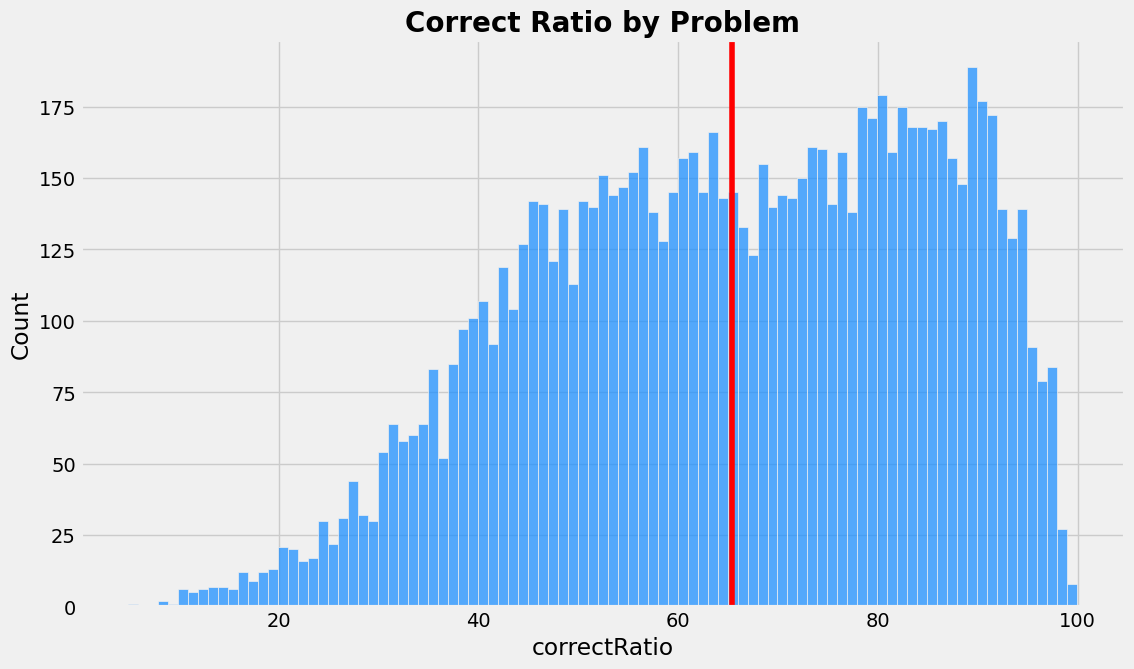

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(problem_df['correctRatio'], binwidth=1, color="dodgerblue")
ax.axvline(problem_df['correctRatio'].mean(), color='red')
ax.set_title("Correct Ratio by Problem", fontsize=20, fontweight="semibold")
plt.show()

# 테그별 정답율

In [91]:
groupby_tag = train_df.groupby("KnowledgeTag")["answerCode"].apply(list)

# 문제별로 맞은 사람 수, 틀린 사람수, 정답률 계산
correction = list() # [[문제ID, 맞은사람수, 틀린사람수, 정답률], ...]
for problem, correctness in zip(groupby_tag.index, groupby_tag):
    correction.append([problem, sum(correctness), len(correctness) - sum(correctness), round(sum(correctness) / len(correctness) * 100, 2)])

# 위에서 생성한 list를 이용해서 dataframe을 생성
tag_df = pd.DataFrame(data=correction, columns=["TagId", "correctCnt", "incorrectCnt", "correctRatio"])
tag_df

,TagId,correctCnt,incorrectCnt,correctRatio
0,23,1052,748,58.44
1,24,220,138,61.45
2,25,79,13,85.87
3,26,1494,938,61.43
4,30,289,250,53.62
...,...,...,...,...
907,11253,3166,1116,73.94
908,11265,307,147,67.62
909,11269,1348,1069,55.77
910,11270,125,136,47.89


In [92]:
tag_df.describe()

,TagId,correctCnt,incorrectCnt,correctRatio
count,912.000000,912.000000,912.000000,912.000000
mean,5179.595395,1626.321272,858.970395,61.552368
std,3450.922602,1293.184603,635.746506,14.832960
min,23.000000,18.000000,10.000000,18.890000
25%,1879.750000,514.750000,375.000000,49.822500
50%,5258.500000,1312.500000,753.500000,59.960000
75%,8124.250000,2628.000000,1200.250000,74.030000
max,11271.000000,10669.000000,5327.000000,97.780000


In [93]:
print('정답율 제일 낮은 테그')
print(tag_df.loc[tag_df['correctRatio'] == 18.890000])
print('-'*26)
print('정답율 제일 높은 테그')
print(tag_df.loc[tag_df['correctRatio'] == 97.780000])

정답율 제일 낮은 테그
     TagId  correctCnt  incorrectCnt  correctRatio
752   8911          41           176         18.89
--------------------------
정답율 제일 높은 테그
     TagId  correctCnt  incorrectCnt  correctRatio
226   1878         616            14         97.78


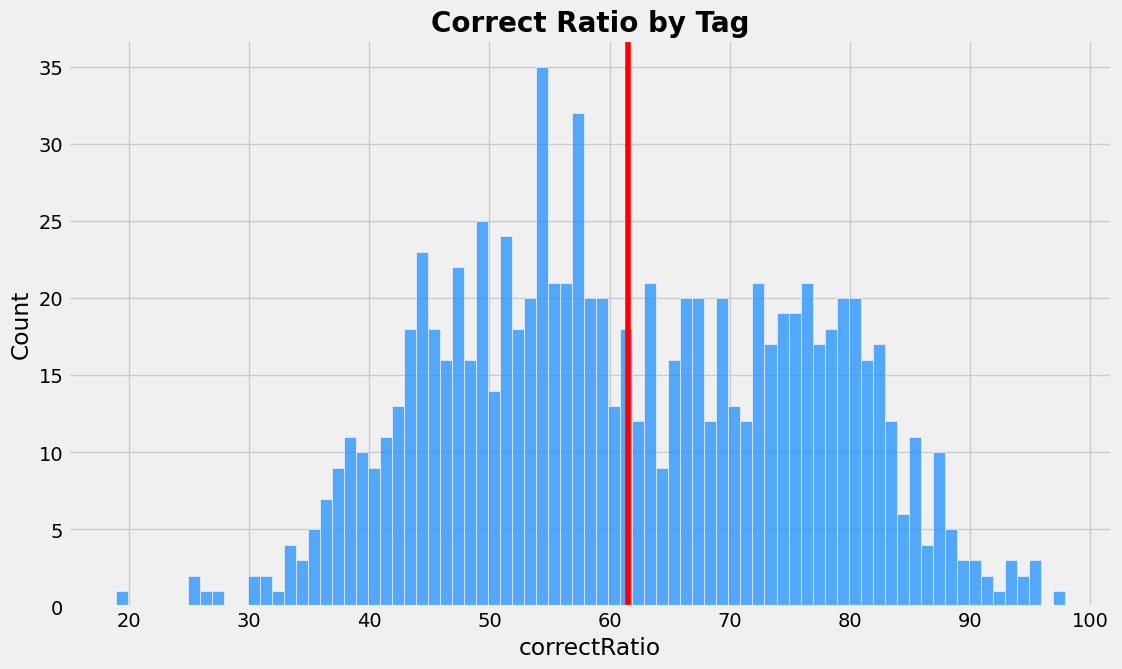

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(tag_df['correctRatio'], binwidth=1, color="dodgerblue")
ax.axvline(tag_df['correctRatio'].mean(), color='red')
ax.set_title("Correct Ratio by Tag", fontsize=20, fontweight="semibold")
plt.show()

# 시험지별 정답율

In [95]:
groupby_test = train_df.groupby('testId')["answerCode"].apply(list)

# 문제별로 맞은 사람 수, 틀린 사람수, 정답률 계산
correction = list() # [[문제ID, 맞은사람수, 틀린사람수, 정답률], ...]
for problem, correctness in zip(groupby_test.index, groupby_test):
    correction.append([problem, sum(correctness), len(correctness) - sum(correctness), round(sum(correctness) / len(correctness) * 100, 2)])

# 위에서 생성한 list를 이용해서 dataframe을 생성
test_paper_df = pd.DataFrame(data=correction, columns=["testId", "correctCnt", "incorrectCnt", "correctRatio"])
test_paper_df

,testId,correctCnt,incorrectCnt,correctRatio
0,A010000001,1468,117,92.62
1,A010000002,1444,106,93.16
2,A010000003,1367,248,84.64
3,A010000004,1360,180,88.31
4,A010000005,1364,231,85.52
...,...,...,...,...
1532,A090000070,144,200,41.86
1533,A090000071,121,239,33.61
1534,A090000072,113,157,41.85
1535,A090000073,143,127,52.96


In [96]:
test_paper_df.describe()

,correctCnt,incorrectCnt,correctRatio
count,1537.000000,1537.000000,1537.000000
mean,965.000000,509.681848,66.798146
std,335.818287,351.317060,13.890359
min,91.000000,20.000000,32.720000
25%,781.000000,281.000000,56.180000
50%,993.000000,425.000000,68.050000
75%,1168.000000,627.000000,77.840000
max,2670.000000,2069.000000,95.550000


In [97]:
print('정답율 제일 낮은 시험지')
print(test_paper_df.loc[test_paper_df['correctRatio'] == 32.720000])
print('-'*26)
print('정답율 제일 높은 시험지')
print(test_paper_df.loc[test_paper_df['correctRatio'] == 95.550000])

정답율 제일 낮은 시험지
          testId  correctCnt  incorrectCnt  correctRatio
1497  A090000035         479           985         32.72
--------------------------
정답율 제일 높은 시험지
         testId  correctCnt  incorrectCnt  correctRatio
770  A040000187        1309            61         95.55


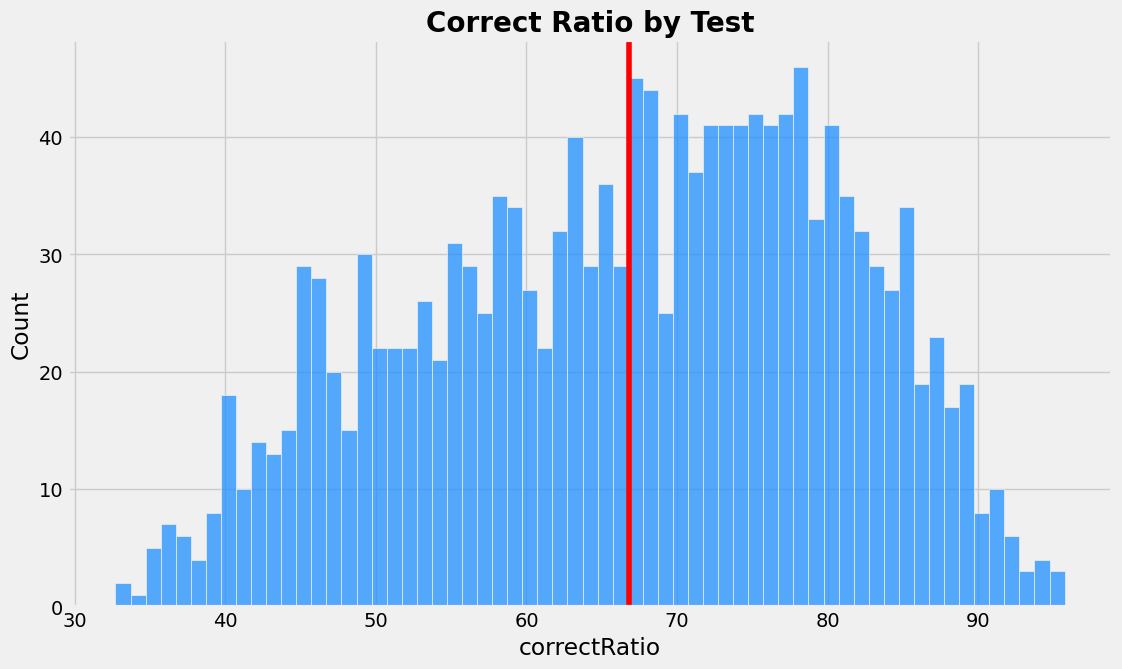

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(test_paper_df['correctRatio'], binwidth=1, color="dodgerblue")
ax.axvline(test_paper_df['correctRatio'].mean(), color='red')
ax.set_title("Correct Ratio by Test", fontsize=20, fontweight="semibold")
plt.show()

# 학생별 정답율

In [99]:
groupby_user = train_df.groupby("userID")["answerCode"].apply(list)

# 문제별로 맞은 사람 수, 틀린 사람수, 정답률 계산
correction = list() # [[문제ID, 맞은사람수, 틀린사람수, 정답률], ...]
for problem, correctness in zip(groupby_user.index, groupby_user):
    correction.append([problem, sum(correctness), len(correctness) - sum(correctness), round(sum(correctness) / len(correctness) * 100, 2)])

# 위에서 생성한 list를 이용해서 dataframe을 생성
user_df = pd.DataFrame(data=correction, columns=["userId", "correctCnt", "incorrectCnt", "correctRatio"])
user_df

,userId,correctCnt,incorrectCnt,correctRatio
0,0,470,275,63.09
1,1,796,137,85.32
2,2,169,107,61.23
3,5,663,170,79.59
4,6,408,513,44.30
...,...,...,...,...
6693,7436,7,8,46.67
6694,7437,6,10,37.50
6695,7438,12,4,75.00
6696,7440,6,9,40.00


In [100]:
user_df.describe()

,userId,correctCnt,incorrectCnt,correctRatio
count,6698.000000,6698.000000,6698.000000,6698.000000
mean,3723.422813,221.439982,116.957450,62.890864
std,2144.399355,228.725932,122.654522,15.963925
min,0.000000,0.000000,0.000000,0.000000
25%,1869.250000,46.000000,27.000000,52.730000
50%,3725.500000,140.000000,75.000000,65.175000
75%,5582.750000,327.000000,167.000000,75.117500
max,7441.000000,1552.000000,1617.000000,100.000000


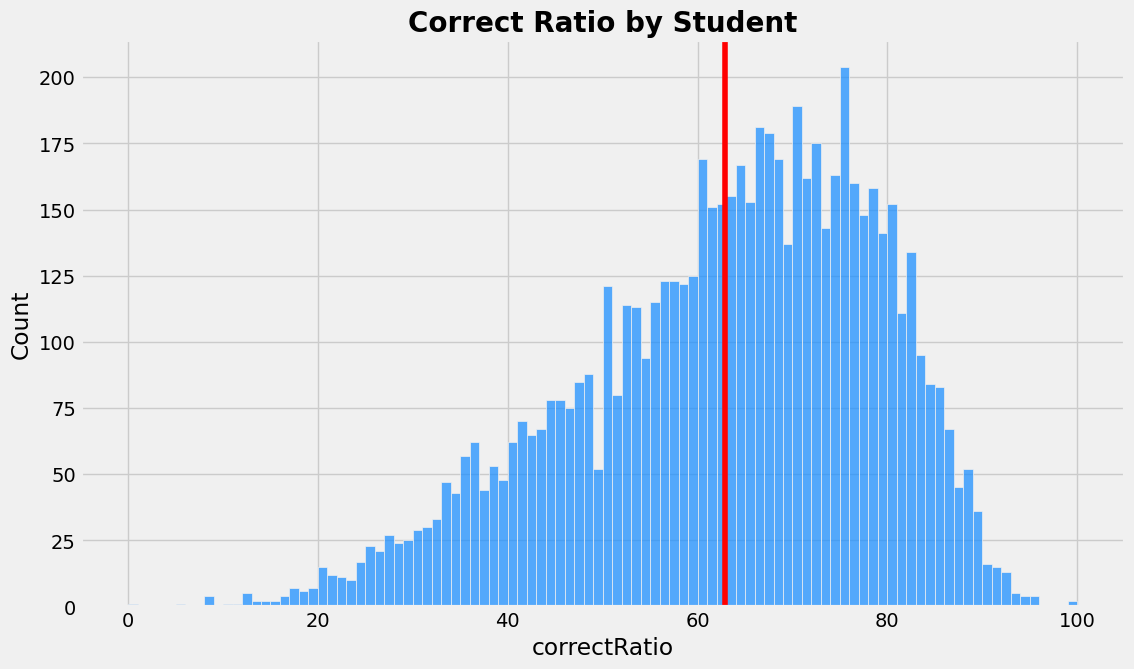

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.histplot(user_df['correctRatio'], binwidth=1, color="dodgerblue")
ax.axvline(user_df['correctRatio'].mean(), color='red')
ax.set_title("Correct Ratio by Student", fontsize=20, fontweight="semibold")
plt.show()

In [102]:
# 같은 문제를 푼 사람 간의 관계
co_user_df = train_df.groupby("userID")["assessmentItemID"].apply(list)
co_user_df

userID
0       [A060001001, A060001002, A060001003, A06000100...
1       [A040013001, A040013002, A040013003, A04001300...
2       [A030050001, A030050002, A030050003, A03005000...
5       [A080001001, A080001002, A080001003, A08000100...
6       [A030016001, A030016002, A030016003, A03001600...
                              ...                        
7436    [A050095001, A050095002, A050095003, A05009500...
7437    [A040072001, A040072002, A040072003, A04007200...
7438    [A080002001, A080002002, A080002003, A08000200...
7440    [A050096001, A050096002, A050096005, A05009600...
7441    [A030071001, A030071002, A030071003, A03007100...
Name: assessmentItemID, Length: 6698, dtype: object

# 한번 푼 문제를 다시 풀어보지 않은 학생

In [114]:
test_user_set = set(test_df['userID'].values)
again_prob = []
for i in range(7442):
    if i in test_user_set: continue

    st0_df = train_df.loc[train_df['userID'] == i]
    if st0_df['assessmentItemID'].nunique() == st0_df.shape[0]:
        again_prob.append(True)
    else:
        again_prob.append(False)

In [117]:
again_prob.count(True)/len(again_prob)

0.8956404896984175